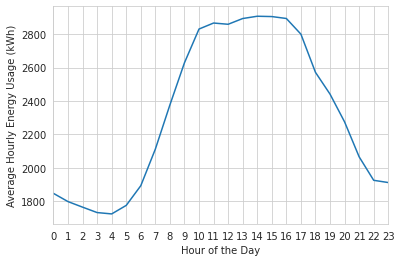

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# 데이터 불러오기
df = pd.read_csv('~/aiffel/datathon/train.csv', encoding='cp949')

# 칼럼정보: 'num', 'date_time', '전력사용량(kWh)', '기온(°C)', '풍속(m/s)', '습도(%)','강수량(mm)', '일조(hr)', '비전기냉방설비운영', '태양광보유'

# 'date_time' 칼럼을 datetime 형식으로 변환
df['date_time'] = pd.to_datetime(df['date_time'])

# 6월 1일부터 8월 24일까지의 데이터 추출
df_period = df.loc[(df['date_time'].dt.date >= pd.to_datetime("2020-06-01").date()) & (df['date_time'].dt.date <= pd.to_datetime("2020-08-24").date())]

# 시간만 추출하고 평균 전력사용량 계산
hourly_avg = df_period.groupby(df_period['date_time'].dt.hour)['전력사용량(kWh)'].mean().reset_index()

# 그래프 그리기
fig, ax = plt.subplots()
sns.lineplot(x='date_time', y='전력사용량(kWh)', data=hourly_avg, ax=ax)
ax.set_xlabel('Hour of the Day')
ax.set_ylabel('Average Hourly Energy Usage (kWh)')

# x축 눈금 설정
ax.set_xticks(range(0, 24))  # x축 눈금을 시간대별로 설정
ax.set_xlim(0, 23)           # x축의 전체 길이를 24시간으로 설정

plt.show()